<a href="https://colab.research.google.com/github/saadeq/Anova-test-greenroutes/blob/main/Anova_test_green_routes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA Test for Green Routes

refrence : https://www.reneshbedre.com/blog/anova.html

getting data from flipside : http://flipsidecrypto.xyz/


### Swap Between **USDC** and **BTC.b**  in **Avalanche**
in the last 7-days


In [ ]:
import requests
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [5]:
url = 'https://api.flipsidecrypto.com/api/v2/queries/d9248cfe-858d-4dea-90cf-d495f0f5046a/data/latest'
result = requests.get(url)
df1 = pd.read_json(result.text)
df1


,PLATFORM,GAS_USED
0,trader-joe-v2,384808
1,woofi,221103
2,trader-joe-v2,277396
3,woofi,178743
4,trader-joe-v2,352599
...,...,...
25524,woofi,221151
25525,trader-joe-v2,357829
25526,trader-joe-v2,357829
25527,trader-joe-v2,357829


In [6]:
groups= []
for platform, group in df1.groupby("PLATFORM"):
    groups.append(group["GAS_USED"].values)

statistic, p_value = f_oneway(*groups)
print("ANOVA Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)


ANOVA Test Results:
Statistic: 1787.9344493268266
p-value: 0.0


In [7]:
model = ols('GAS_USED ~ C(PLATFORM)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PLATFORM),1.880668e+14,3.0,1787.934449,0.0
Residual,8.949629e+14,25525.0,NaN,NaN


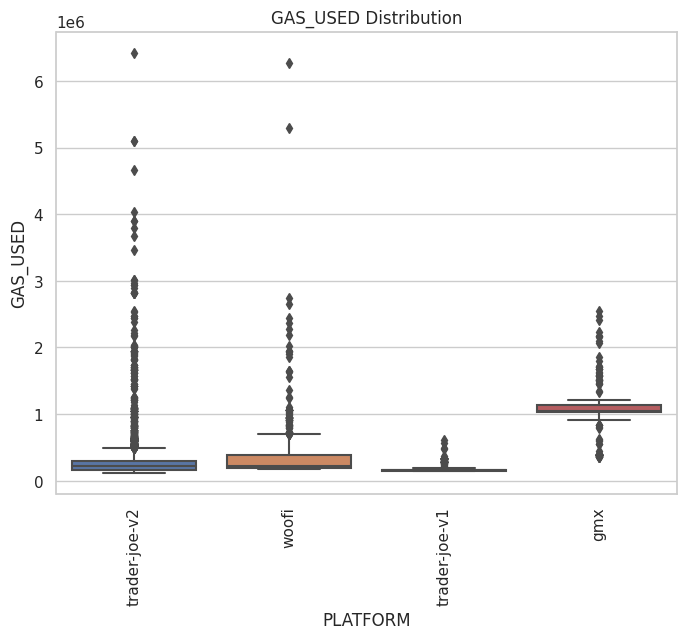

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x="PLATFORM", y="GAS_USED", data=df1)

plt.xticks(rotation='vertical')
plt.xlabel('PLATFORM')
plt.ylabel('GAS_USED')
plt.title('GAS_USED Distribution')

plt.show()

### Swap Between **MATIC** and **USDT**  in **Polygon**
in the last 7-days


In [9]:
url = 'https://api.flipsidecrypto.com/api/v2/queries/485324af-1e3c-44bf-8214-2cadd61d7152/data/latest'
result = requests.get(url)
df2 = pd.read_json(result.text)
df2

,PLATFORM,GAS_USED
0,quickswap-v2,104997
1,quickswap-v3,333579
2,uniswap-v3,122704
3,uniswap-v3,281406
4,uniswap-v3,211970
...,...,...
58959,uniswap-v3,186091
58960,uniswap-v3,230317
58961,uniswap-v3,636225
58962,uniswap-v3,204774


In [10]:
groups =[]
for platfprm,group in df2.groupby('PLATFORM'):
    groups.append(group["GAS_USED"].values)
statistic, p_value = f_oneway(*groups)
print("ANOVA Test Results:")
print("Statistic:", statistic)
print("p-value:", p_value)

ANOVA Test Results:
Statistic: 263.0862577856525
p-value: 0.0


In [11]:
model = ols('GAS_USED ~ C(PLATFORM)', data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PLATFORM),2.368864e+14,8.0,263.086258,0.0
Residual,6.635483e+15,58955.0,NaN,NaN


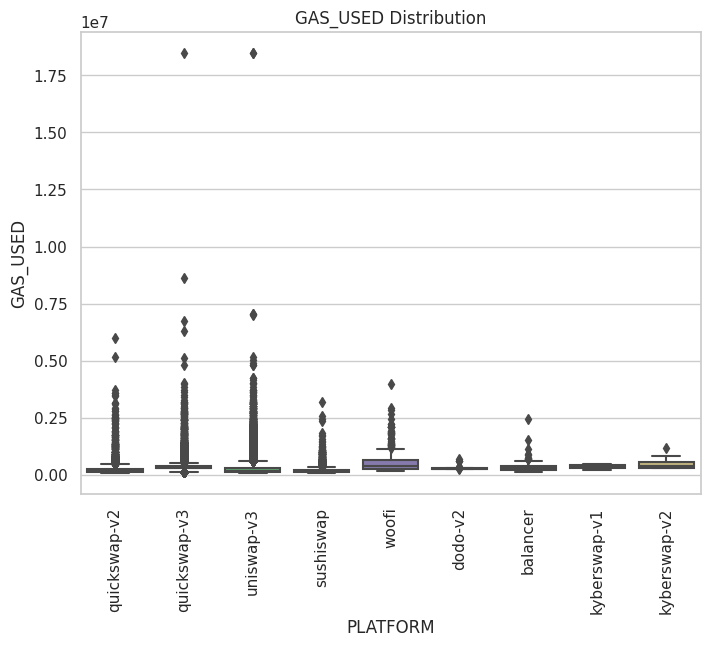

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x="PLATFORM", y="GAS_USED", data=df2)

plt.xticks(rotation='vertical')
plt.xlabel('PLATFORM')
plt.ylabel('GAS_USED')
plt.title('GAS_USED Distribution')

plt.show()